# Projet 9 : Produisez une étude de marché avec R ou Python

* Réalisation d'une classification ascendante hiérarchique, avec un dendrogramme comme visualisation. 

* Ensuite utilisation de la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering (+ analyser les centroïdes de tes classes). 

* Réalisation d'une ACP afin de visualiser les résultats de l'analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

* Réalisation d'une heatmap avec les croisements entre les clusters de pays et les différentes variables (en format image)

In [1]:
import pandas as pd
import numpy as np 
import datetime

impor = pd.read_csv("importation.csv")
infla = pd.read_csv("Inflation.csv")

pib = pd.read_csv("pib.csv")
pop = pd.read_csv("population 2000-2018.csv")
product = pd.read_csv("production.csv")
politique = pd.read_csv("stabilitepol.csv")
proteine = pd.read_csv("dispo protéine.csv")
crise = pd.read_csv("FAOSTAT_data_fr_7-27-2022.csv")

* Nous travaillons sur l'année 2017.
* Je vais calculer la variation de la population par pays entre l'année 2015 et 2017 afin de voir si elle diminue, augmente ou stagne.
* Variation absolue = ((valeur d'arrivée - valeur de départ) / valeur de départ)*100

# Traitement de la table "crise"

* Je traite la table insécurité alimentaire grave (2017) en la filtrant sur le pourcentage total
* Je remplace les valeurs nulles par 0. Concernant le Viet Nam qui a une valeur <0.5, je remplace également par 0.5.

In [2]:
crise["Produit"].unique()

array(['Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire grave – hommes adultes (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire grave – femmes adultes (%) (moyenne sur 3 ans)'],
      dtype=object)

In [3]:
crisetotale = crise[crise["Produit"]=="Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)"]
crisetotale 

,Zone,Produit,Insécurité alimentaire (%)
0,Afghanistan,Prévalence de l’insécurité alimentaire grave –...,17.3
3,Afrique du Sud,Prévalence de l’insécurité alimentaire grave –...,NaN
6,Albanie,Prévalence de l’insécurité alimentaire grave –...,11
9,Algérie,Prévalence de l’insécurité alimentaire grave –...,11.4
12,Allemagne,Prévalence de l’insécurité alimentaire grave –...,0.7
...,...,...,...
597,Venezuela (République bolivarienne du),Prévalence de l’insécurité alimentaire grave –...,NaN
600,Viet Nam,Prévalence de l’insécurité alimentaire grave –...,<0.5
603,Yémen,Prévalence de l’insécurité alimentaire grave –...,NaN
606,Zambie,Prévalence de l’insécurité alimentaire grave –...,24.1


In [4]:
crisetotale = crisetotale.fillna(0)
crisetotale

,Zone,Produit,Insécurité alimentaire (%)
0,Afghanistan,Prévalence de l’insécurité alimentaire grave –...,17.3
3,Afrique du Sud,Prévalence de l’insécurité alimentaire grave –...,0
6,Albanie,Prévalence de l’insécurité alimentaire grave –...,11
9,Algérie,Prévalence de l’insécurité alimentaire grave –...,11.4
12,Allemagne,Prévalence de l’insécurité alimentaire grave –...,0.7
...,...,...,...
597,Venezuela (République bolivarienne du),Prévalence de l’insécurité alimentaire grave –...,0
600,Viet Nam,Prévalence de l’insécurité alimentaire grave –...,<0.5
603,Yémen,Prévalence de l’insécurité alimentaire grave –...,0
606,Zambie,Prévalence de l’insécurité alimentaire grave –...,24.1


In [5]:
crisetotale = crisetotale.replace("<0.5", 0)
crisetotale

,Zone,Produit,Insécurité alimentaire (%)
0,Afghanistan,Prévalence de l’insécurité alimentaire grave –...,17.3
3,Afrique du Sud,Prévalence de l’insécurité alimentaire grave –...,0
6,Albanie,Prévalence de l’insécurité alimentaire grave –...,11
9,Algérie,Prévalence de l’insécurité alimentaire grave –...,11.4
12,Allemagne,Prévalence de l’insécurité alimentaire grave –...,0.7
...,...,...,...
597,Venezuela (République bolivarienne du),Prévalence de l’insécurité alimentaire grave –...,0
600,Viet Nam,Prévalence de l’insécurité alimentaire grave –...,0
603,Yémen,Prévalence de l’insécurité alimentaire grave –...,0
606,Zambie,Prévalence de l’insécurité alimentaire grave –...,24.1


* Je vérifie qu'aucune autre valeur non-numérique n'apparaisse.

In [6]:
crisetotale["Insécurité alimentaire (%)"].unique()

array(['17.3', 0, '11', '11.4', '0.7', '11.2', '1.2', '3.6', '1.1',
       '11.6', '14.4', '1.3', '22.8', '1.7', '2.1', '11.7', '9.6', '14',
       '28.2', '0.6', '3.4', '49.7', '2.2', '8.4', '0.8', '8.6', '1.4',
       '1', '0.9', '14.8', '23.6', '7.5', '6.9', '3.2', '8.3', '17.1',
       '14.1', '8.7', '2.9', '1.5', '1.6', '24.5', '0.5', '12.7', '21.6',
       '4.9', '38.3', '14.3', '3.1', '6.7', '5.7', '6.3', '5.5', '3.3',
       '5.9', '2.3', '40.7', '30.5', '10', '13.6', '4.2', '4.4', '2.6',
       '16.6', '25.6', '4', '4.5', '8.1', '10.3', '7', '1.9', '32.6',
       '15.4', '65.4', '7.2', '15.8', '9.1', '2', '7.4', '24.1', '35.9'],
      dtype=object)

* Je supprime la colonne "Produit".

In [7]:
crisetotale = crisetotale.drop(columns=["Produit"])
crisetotale

,Zone,Insécurité alimentaire (%)
0,Afghanistan,17.3
3,Afrique du Sud,0
6,Albanie,11
9,Algérie,11.4
12,Allemagne,0.7
...,...,...
597,Venezuela (République bolivarienne du),0
600,Viet Nam,0
603,Yémen,0
606,Zambie,24.1


# Traitement de la table "population" pour voir l'évolution entre l'année 2015 et 2017

In [8]:
p2015= pop[pop['Année'] == 2015]
p2015

,Zone,Année,Population totale (1000 personnes)
15,Afghanistan,2015,34413.603
34,Afrique du Sud,2015,55386.367
53,Albanie,2015,2890.513
72,Algérie,2015,39728.025
91,Allemagne,2015,81787.411
...,...,...,...
4331,Venezuela (République bolivarienne du),2015,30081.829
4350,Viet Nam,2015,92677.076
4369,Yémen,2015,26497.889
4388,Zambie,2015,15879.361


In [9]:
p2017= pop[pop['Année'] ==2017]
p2017

,Zone,Année,Population totale (1000 personnes)
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484
4352,Viet Nam,2017,94600.648
4371,Yémen,2017,27834.819
4390,Zambie,2017,16853.599


In [10]:
popmerge = pd.merge(p2017, p2015, on='Zone', how='outer')
popmerge


,Zone,Année_x,Population totale (1000 personnes)_x,Année_y,Population totale (1000 personnes)_y
0,Afghanistan,2017,36296.113,2015,34413.603
1,Afrique du Sud,2017,57009.756,2015,55386.367
2,Albanie,2017,2884.169,2015,2890.513
3,Algérie,2017,41389.189,2015,39728.025
4,Allemagne,2017,82658.409,2015,81787.411
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402.484,2015,30081.829
232,Viet Nam,2017,94600.648,2015,92677.076
233,Yémen,2017,27834.819,2015,26497.889
234,Zambie,2017,16853.599,2015,15879.361


In [11]:
a = popmerge['Population totale (1000 personnes)_x']
d = popmerge['Population totale (1000 personnes)_y']

In [12]:
variation = ((a-d)/d)*100

In [13]:
popmerge = popmerge.assign(variation=variation)
popmerge

,Zone,Année_x,Population totale (1000 personnes)_x,Année_y,Population totale (1000 personnes)_y,variation
0,Afghanistan,2017,36296.113,2015,34413.603,5.470250
1,Afrique du Sud,2017,57009.756,2015,55386.367,2.931026
2,Albanie,2017,2884.169,2015,2890.513,-0.219477
3,Algérie,2017,41389.189,2015,39728.025,4.181341
4,Allemagne,2017,82658.409,2015,81787.411,1.064954
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402.484,2015,30081.829,-2.258323
232,Viet Nam,2017,94600.648,2015,92677.076,2.075564
233,Yémen,2017,27834.819,2015,26497.889,5.045421
234,Zambie,2017,16853.599,2015,15879.361,6.135247


* Je conserve la population de l'année 2017 et je supprime les colonnes inutiles ou redondantes.

In [14]:
popmerge = popmerge.drop(columns=["Année_y", "Population totale (1000 personnes)_y", "Année_x"])
popmerge

,Zone,Population totale (1000 personnes)_x,variation
0,Afghanistan,36296.113,5.470250
1,Afrique du Sud,57009.756,2.931026
2,Albanie,2884.169,-0.219477
3,Algérie,41389.189,4.181341
4,Allemagne,82658.409,1.064954
...,...,...,...
231,Venezuela (République bolivarienne du),29402.484,-2.258323
232,Viet Nam,94600.648,2.075564
233,Yémen,27834.819,5.045421
234,Zambie,16853.599,6.135247


# Traitement de la table "inflation"

* Je souhaite avoir une moyenne de l'inflation sur l'ensemble de l'année 2017 (et non par mois).

In [15]:
infla2017= infla.groupby(by='Zone').mean()
infla2017

,Food price inflation (%)
Zone,
Afghanistan,6.957529
Afrique du Sud,6.905835
Albanie,4.135979
Algérie,5.040496
Allemagne,2.762497
...,...
Éthiopie,11.284114
Îles Caïmanes,0.735739
Îles Cook,0.635873


In [16]:
infla2017.reset_index(level=0, inplace=True) 

# JOINTURES

In [17]:
merge1 = pd.merge(popmerge, infla2017, on='Zone', how='outer')
merge1

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%)
0,Afghanistan,36296.113,5.470250,6.957529
1,Afrique du Sud,57009.756,2.931026,6.905835
2,Albanie,2884.169,-0.219477,4.135979
3,Algérie,41389.189,4.181341,5.040496
4,Allemagne,82658.409,1.064954,2.762497
...,...,...,...,...
233,Yémen,27834.819,5.045421,7.161697
234,Zambie,16853.599,6.135247,5.773024
235,Zimbabwe,14236.595,3.054487,2.534985
236,Guinee Équatoriale,NaN,NaN,1.605671


In [18]:
merge2 = pd.merge(merge1, pib, on='Zone', how='outer')
merge2

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3
2,Albanie,2884.169,-0.219477,4.135979,12771.0
3,Algérie,41389.189,4.181341,5.040496,11737.4
4,Allemagne,82658.409,1.064954,2.762497,53071.5
...,...,...,...,...,...
234,Zambie,16853.599,6.135247,5.773024,3485.0
235,Zimbabwe,14236.595,3.054487,2.534985,3795.6
236,Guinee Équatoriale,NaN,NaN,1.605671,NaN
237,SAoûtomé-et-Principe,NaN,NaN,6.571240,NaN


In [19]:
merge3= pd.merge(merge2, politique, on='Zone', how='outer')
merge3

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59
...,...,...,...,...,...,...
235,Zimbabwe,14236.595,3.054487,2.534985,3795.6,-0.71
236,Guinee Équatoriale,NaN,NaN,1.605671,NaN,NaN
237,SAoûtomé-et-Principe,NaN,NaN,6.571240,NaN,NaN
238,Chine,NaN,NaN,NaN,14520.8,NaN


In [20]:
merge4= pd.merge(merge3, impor, on='Zone', how='outer')
merge4

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0
...,...,...,...,...,...,...,...
235,Zimbabwe,14236.595,3.054487,2.534985,3795.6,-0.71,6.0
236,Guinee Équatoriale,NaN,NaN,1.605671,NaN,NaN,NaN
237,SAoûtomé-et-Principe,NaN,NaN,6.571240,NaN,NaN,NaN
238,Chine,NaN,NaN,NaN,14520.8,NaN,NaN


In [21]:
merge5= pd.merge(merge4, proteine, on='Zone', how='outer')
merge5

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Année,Disponibilités protéines moyennes d’origine animale (g/personne/jour)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,2017.0,10.7
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,2017.0,35.7
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,2017.0,61.0
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,2017.0,25.0
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,2017.0,63.0
...,...,...,...,...,...,...,...,...,...
235,Zimbabwe,14236.595,3.054487,2.534985,3795.6,-0.71,6.0,2017.0,NaN
236,Guinee Équatoriale,NaN,NaN,1.605671,NaN,NaN,NaN,NaN,NaN
237,SAoûtomé-et-Principe,NaN,NaN,6.571240,NaN,NaN,NaN,NaN,NaN
238,Chine,NaN,NaN,NaN,14520.8,NaN,NaN,2017.0,40.3


In [22]:
merge6= pd.merge(merge5, crisetotale, on='Zone', how='outer')
merge6

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Année,Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,2017.0,10.7,17.3
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,2017.0,35.7,0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,2017.0,61.0,11
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,2017.0,25.0,11.4
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,2017.0,63.0,0.7
...,...,...,...,...,...,...,...,...,...,...
235,Zimbabwe,14236.595,3.054487,2.534985,3795.6,-0.71,6.0,2017.0,NaN,35.9
236,Guinee Équatoriale,NaN,NaN,1.605671,NaN,NaN,NaN,NaN,NaN,NaN
237,SAoûtomé-et-Principe,NaN,NaN,6.571240,NaN,NaN,NaN,NaN,NaN,NaN
238,Chine,NaN,NaN,NaN,14520.8,NaN,NaN,2017.0,40.3,0


* Je remplace les valeurs nulles par 0

In [23]:
merge6 = merge6.fillna(0)

* Je vais supprimer les pays pour lesquels le pib n'est pas indiqué, ni la population totale.

In [24]:
supp = merge6[(merge6["Disponibilités protéines moyennes d’origine animale (g/personne/jour)"] == 0) & (merge6['PIB par habitant ($)'] ==0 )].index

In [25]:
merge6.drop(supp , inplace=True)

In [26]:
merge6

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Année,Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,2017.0,10.7,17.3
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,2017.0,35.7,0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,2017.0,61.0,11
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,2017.0,25.0,11.4
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,2017.0,63.0,0.7
...,...,...,...,...,...,...,...,...,...,...
232,Viet Nam,94600.648,2.075564,-1.072609,8996.4,0.23,291.0,2017.0,32.0,0
233,Yémen,27834.819,5.045421,7.161697,0.0,-2.94,78.0,2017.0,9.7,0
234,Zambie,16853.599,6.135247,5.773024,3485.0,0.15,12.0,2017.0,13.7,24.1
235,Zimbabwe,14236.595,3.054487,2.534985,3795.6,-0.71,6.0,2017.0,0.0,35.9


In [27]:
supp1 = merge6[merge6["Population totale (1000 personnes)_x"] ==0].index

In [28]:
merge6.drop(supp1 , inplace=True)

In [29]:
merge6

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Année,Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,2017.0,10.7,17.3
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,2017.0,35.7,0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,2017.0,61.0,11
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,2017.0,25.0,11.4
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,2017.0,63.0,0.7
...,...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),29402.484,-2.258323,480.863389,0.0,-1.27,25.0,2017.0,24.0,0
232,Viet Nam,94600.648,2.075564,-1.072609,8996.4,0.23,291.0,2017.0,32.0,0
233,Yémen,27834.819,5.045421,7.161697,0.0,-2.94,78.0,2017.0,9.7,0
234,Zambie,16853.599,6.135247,5.773024,3485.0,0.15,12.0,2017.0,13.7,24.1


* Je supprime la colonne concernant l'année (car nous admettons dés le début que nous travaillons sur l'année 2017).

In [30]:
merge6 = merge6.drop(columns=["Année"])

In [31]:
merge6.head()

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7


* Je vais également supprimer la ligne faisant référence à la France car le but de l'étude est de choisir des pays à l'international.

In [32]:
merge6.drop(merge6[merge6['Zone'] =="France"].index, inplace=True)

In [33]:
merge6

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%)
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7
...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),29402.484,-2.258323,480.863389,0.0,-1.27,25.0,24.0,0
232,Viet Nam,94600.648,2.075564,-1.072609,8996.4,0.23,291.0,32.0,0
233,Yémen,27834.819,5.045421,7.161697,0.0,-2.94,78.0,9.7,0
234,Zambie,16853.599,6.135247,5.773024,3485.0,0.15,12.0,13.7,24.1


### Nettoyage et renommer des colonnes

* création d'une colonne avec la population totale (en millions)

In [34]:
a = merge6['Population totale (1000 personnes)_x']

merge6["Population"]= a*1000

In [35]:
merge6

,Zone,Population totale (1000 personnes)_x,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%),Population
0,Afghanistan,36296.113,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3,36296113.0
1,Afrique du Sud,57009.756,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0,57009756.0
2,Albanie,2884.169,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11,2884169.0
3,Algérie,41389.189,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4,41389189.0
4,Allemagne,82658.409,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7,82658409.0
...,...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),29402.484,-2.258323,480.863389,0.0,-1.27,25.0,24.0,0,29402484.0
232,Viet Nam,94600.648,2.075564,-1.072609,8996.4,0.23,291.0,32.0,0,94600648.0
233,Yémen,27834.819,5.045421,7.161697,0.0,-2.94,78.0,9.7,0,27834819.0
234,Zambie,16853.599,6.135247,5.773024,3485.0,0.15,12.0,13.7,24.1,16853599.0


In [36]:
merge6 = merge6.drop(columns=["Population totale (1000 personnes)_x"])

In [37]:
merge6

,Zone,variation,Food price inflation (%),PIB par habitant ($),Stabilite,Importations (Milliers de tonnes),Disponibilités protéines moyennes d’origine animale (g/personne/jour),Insécurité alimentaire (%),Population
0,Afghanistan,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3,36296113.0
1,Afrique du Sud,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0,57009756.0
2,Albanie,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11,2884169.0
3,Algérie,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4,41389189.0
4,Allemagne,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7,82658409.0
...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),-2.258323,480.863389,0.0,-1.27,25.0,24.0,0,29402484.0
232,Viet Nam,2.075564,-1.072609,8996.4,0.23,291.0,32.0,0,94600648.0
233,Yémen,5.045421,7.161697,0.0,-2.94,78.0,9.7,0,27834819.0
234,Zambie,6.135247,5.773024,3485.0,0.15,12.0,13.7,24.1,16853599.0


In [38]:
merge6.rename(columns={'Food price inflation (%)': 'Inflation'}, inplace=True)
merge6.rename(columns={'PIB par habitant ($)': 'PIB'}, inplace=True)
merge6.rename(columns={'Importations (Milliers de tonnes)': 'Importations'}, inplace=True)
merge6.rename(columns={'Disponibilités protéines moyennes d’origine animale (g/personne/jour)': 'Disponibilités protéines'}, inplace=True)

In [39]:
merge6

,Zone,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Insécurité alimentaire (%),Population
0,Afghanistan,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3,36296113.0
1,Afrique du Sud,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0,57009756.0
2,Albanie,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11,2884169.0
3,Algérie,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4,41389189.0
4,Allemagne,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7,82658409.0
...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),-2.258323,480.863389,0.0,-1.27,25.0,24.0,0,29402484.0
232,Viet Nam,2.075564,-1.072609,8996.4,0.23,291.0,32.0,0,94600648.0
233,Yémen,5.045421,7.161697,0.0,-2.94,78.0,9.7,0,27834819.0
234,Zambie,6.135247,5.773024,3485.0,0.15,12.0,13.7,24.1,16853599.0


## <span style='background:red'> Résultats </span>

* Sur les 240 individus (pays), il en reste 193 suite aux différents filtrages.
* Il y a 8 variables.
* La colonne année également été supprimée car inutile.


# 1) Dendrogramme
* Le clustering a pour objectif de créer des groupes d’observations homogènes.
* Le dendogramme ou arbre de classification ou de segmentation est un diagramme servant généralement à illustrer différents groupes définis par une classification hiérarchique.
* Le but est de créer des groupes d’observations homogènes.


* Contrairement au k-means, la classification hiérarchique ne nécessite pas de déterminer un nombre de classes au préalable. En effet, en jouant sur la profondeur de l'arbre, on peut explorer différentes possibilités et choisir le nombre de classes qui nous convient le mieux.
* Nous pouvons choisir un nombre de classes en observant le dendrogramme.

In [40]:
merge6.set_index('Zone', inplace=True)
X = merge6.values
X.shape

(193, 8)

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition


* Centrer-réduire
- Centrer une variable consiste à soustraire son espérance à chacune de ses valeurs initiales, soit retrancher à chaque donnée la moyenne (c'est ce qui s’appelle un centrage). Cela consiste simplement en un changement d’origine, qui place la moyenne de la distribution au point 0 de l'axe des abscisses1.
- Réduire une variable consiste à diviser toutes ses valeurs par son écart type.

In [42]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [43]:
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

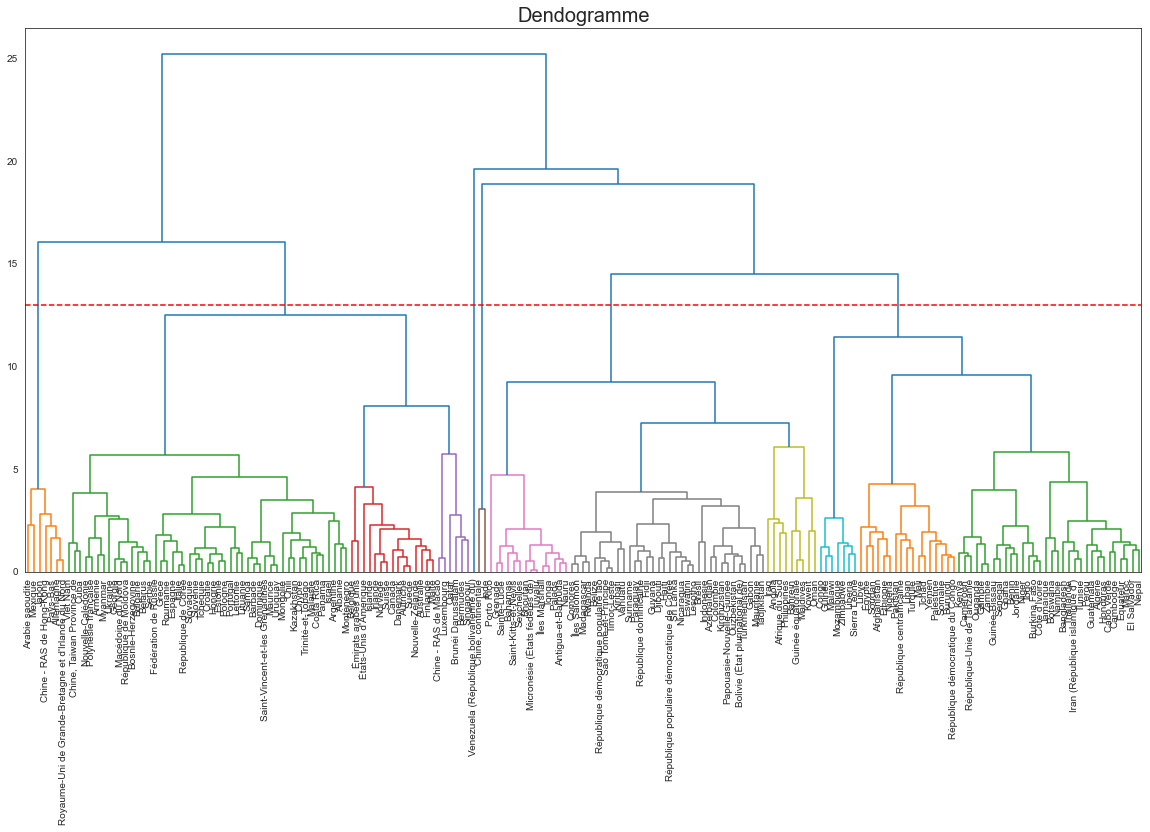

In [44]:
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Dendogramme', fontsize=20)


dendrogram(Z, labels = merge6.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.axhline(linestyle= '--', y = 13, color="red") # ligne visuelle 
plt.show()



* Je choisis de divier en 6 clusters afin d'avoir des groupes pas trop imposants et sélectionner les pays adéquats.

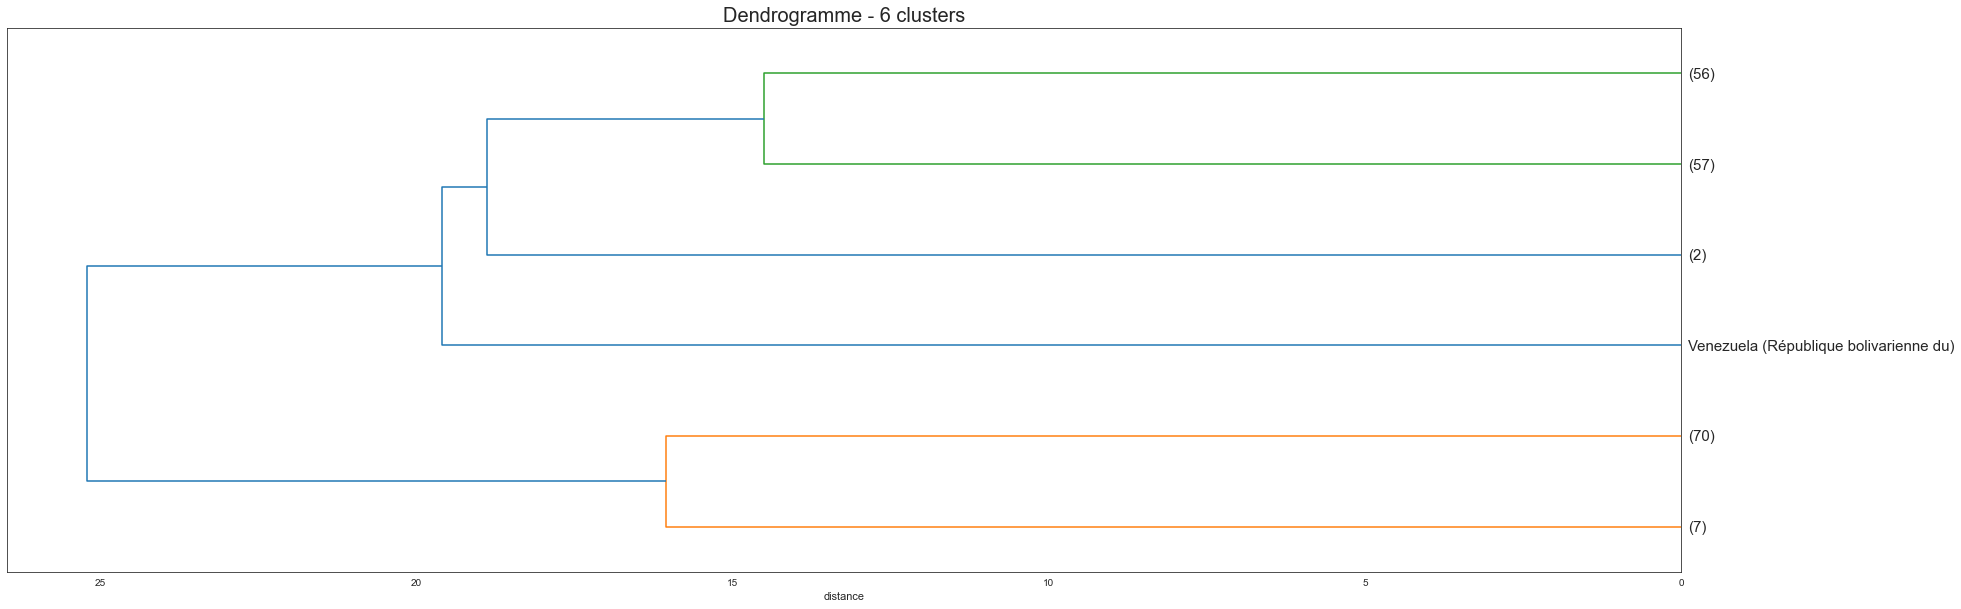

In [45]:
fig = plt.figure(figsize=(30,10))
plt.title('Dendrogramme - 6 clusters', fontsize=20)
plt.xlabel('distance', fontsize=11)

dendrogram(Z, labels = merge6.index, p=6, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()


In [46]:
#Identification des 6 groupes obtenus
groupes = fcluster(Z, 6, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes)))

#Index trié des groupes
idg = np.argsort(groupes)

#Affichage des pays selon leurs groupes
merge6_groupes = pd.DataFrame(merge6.index[idg], groupes[idg]).reset_index()
merge6_groupes = merge6_groupes.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3 4 5 6]


In [47]:
#Intégration des groupes dans notre échantillon de départ
#Jointure interne nécessaire pour parvenir à agréger nos données
merge6_groupes = pd.merge(merge6, merge6_groupes, on='Zone')
merge6_groupes.head()

,Zone,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Insécurité alimentaire (%),Population,Groupe
0,Afghanistan,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3,36296113.0,5
1,Afrique du Sud,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0,57009756.0,4
2,Albanie,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11,2884169.0,2
3,Algérie,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4,41389189.0,5
4,Allemagne,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7,82658409.0,1


In [48]:
#Préparation de sous-ensembles permettant de caractériser les groupes
merge6_groupe1 = merge6_groupes[merge6_groupes['Groupe'] == 1]
merge6_groupe2 = merge6_groupes[merge6_groupes['Groupe'] == 2]
merge6_groupe3 = merge6_groupes[merge6_groupes['Groupe'] == 3]
merge6_groupe4 = merge6_groupes[merge6_groupes['Groupe'] == 4]
merge6_groupe5 = merge6_groupes[merge6_groupes['Groupe'] == 5]
merge6_groupe6 = merge6_groupes[merge6_groupes['Groupe'] == 6]

In [49]:
merge6_groupes.groupby('Groupe').mean()

,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Population
Groupe,,,,,,,
1,1.560845,2.237038,46120.914286,0.342857,842.714286,58.857143,6.558497e+07
2,0.929869,2.614315,35287.322857,0.522571,68.942857,51.270000,1.864730e+07
3,1.592338,0.814567,3091.450000,-0.380000,226.000000,27.350000,1.379849e+09
4,3.259998,4.033325,12470.992982,0.054912,40.736842,18.396491,1.741297e+07
5,4.519548,7.178008,6142.005357,-0.912857,21.250000,16.217857,3.395145e+07
6,-2.258323,480.863389,0.000000,-1.270000,25.000000,24.000000,2.940248e+07


Afin de choisir le cluster idéal, je vais m'appuyer sur les résultats par variable.
Idéalement, le pays parfait est un pays avec un importante consommation de protéïne d'origine animale (pas de pays ayant une culture du végétarisme), un taux d'inflation correct (aux alentours des 2% comme recommandé par la BCE), un PIB par habitant important (afin d'avoir des clients ayant un fort pouvoir d'achat) et une satabilité politique positive.

De ce fait, je conserve les groupes 1 et 2 car ce sont les groupes qui correspondent aux critères précédemment établis 


In [50]:
print(merge6_groupe1['Zone'].unique())
print(merge6_groupe2['Zone'].unique())

['Allemagne' 'Arabie saoudite' 'Chine - RAS de Hong-Kong' 'Japon'
 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]
['Albanie' 'Argentine' 'Arménie' 'Australie' 'Autriche' 'Barbade'
 'Bélarus' 'Belgique' 'Bermudes' 'Bosnie-Herzégovine' 'Brunéi Darussalam'
 'Bulgarie' 'Canada' 'Chili' 'Chine - RAS de Macao'
 'Chine, Taiwan Province de' 'Chypre' 'Costa Rica' 'Croatie' 'Cuba'
 'Danemark' 'Dominique' 'Émirats arabes unis' 'Espagne' 'Estonie'
 "États-Unis d'Amérique" 'Fédération de Russie' 'Finlande' 'Géorgie'
 'Grèce' 'Hongrie' 'Irlande' 'Islande' 'Israël' 'Italie' 'Kazakhstan'
 'Lettonie' 'Lituanie' 'Luxembourg' 'Macédoine du Nord' 'Malaisie' 'Malte'
 'Maurice' 'Mongolie' 'Monténégro' 'Myanmar' 'Norvège'
 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Panama' 'Pologne'
 'Polynésie française' 'Portugal' 'Qatar' 'République de Corée'
 'République de Moldova' 'Roumanie' 'Saint-Vincent-et-les Grenadines'
 'Samoa' 'Serbie' 'Singapour' 'Slovaquie' 'Slovénie' 'Suède' 'Suiss

### Choix des pays (Dendogramme)

* Elimination des pays sous embargos commerciaux: *Fédération de Russie, Bélarus, Myanmar, Ukraine*
* Interrogation concernant des produits devant recevoir une certification avant d'être distribués dans ledit pays: *Arabie saoudite, Malaisie, Qatar, Émirats arabes unis, Brunéi Darussalam, Israël*

* Pays UE et contient Européen : *Allemagne, Pays-Bas, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Albanie, Arménie, Autriche, Belgique, Bosnie-Herzégovine, Bulgarie, Chypre, Croatie,  Danemark, Espagne, Estonie, Finlande, Géorgie, Grèce, Hongrie, Irlande, Islande, Italie, Kazakhstan, Lettonie, Lituanie, Luxembourg, Macédoine du Nord, Malte, Monténégro, Norvège, Pologne, Portugal, République de Moldova, Roumanie, Serbie, Slovaquie, Slovénie, Suède, Suisse, Tchéquie*

* Pays hors UE : *Canada, Chili, Chine, Taiwan Province de, Chine - RAS de Macao, Chine - RAS de Hong-Kong, Japon, Mexique, Argentine, Australie, Barbade, Bermudes,Costa Rica, Cuba, Dominique, États-Unis d'Amérique, Maurice, Mongolie, Nouvelle-Calédonie, Nouvelle-Zélande, Panama, Polynésie française, République de Corée, Saint-Vincent-et-les Grenadines, Samoa, Singapour, Trinité-et-Tobago, Uruguay, Viet Nam*

Privilégier dans un premier temps les pays de l'UE afin de bénéficier de l'union douanière et les avantages qui en découlent (proximité géographique, monnaie commune (en majorité) afin d'éliminer les risques de change). 
Au sein de ce groupe, nous allons appliquer les critères établis afin d'effectuer un second filtrage et sélectionner les pays européens les plus adéquats.

###### Je vais sélectionner parmi la liste des 39 pays européens, ceux, consommant le plus de protéine d'origine animale (volaille) et les regrouper par le PIB par habitant également.

In [51]:
liste0 = ["Allemagne", "Pays-Bas", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", "Albanie", "Arménie", "Autriche", "Belgique", "Bosnie-Herzégovine", "Bulgarie", "Chypre", "Croatie", "Danemark", "Espagne", "Estonie", "Finlande", "Géorgie", "Grèce", "Hongrie", "Irlande", "Islande", "Italie", "Kazakhstan", "Lettonie", "Lituanie", "Luxembourg", "Macédoine du Nord", "Malte", "Monténégro", "Norvège", "Pologne", "Portugal", "République de Moldova", "Roumanie", "Serbie", "Slovaquie", "Slovénie", "Suède", "Suisse", "Tchéquie"]

In [52]:
len(liste0)

39

In [53]:
dendo = merge6

In [54]:
dendo['new_col'] = range(1, len(dendo) + 1)
dendo['new_col'] = dendo.index

In [55]:
dendo = dendo[dendo.new_col.isin(liste0)]

In [56]:
dendoue = dendo[dendo.new_col.isin(liste0)]
dendotri = dendoue.groupby(["new_col","PIB","Disponibilités protéines"]).mean().sort_values(by="Disponibilités protéines", ascending=False)
dendotri

,,,variation,Inflation,Stabilite,Importations,Population
new_col,PIB,Disponibilités protéines,,,,,
Islande,55638.5,103.0,1.256650,-2.410543,1.35,2.0,334393.0
Danemark,55356.7,77.0,0.766063,2.804291,0.87,133.0,5732274.0
Lituanie,33761.9,75.3,-2.949166,3.566524,0.78,44.0,2845414.0
Finlande,47570.1,74.3,0.551876,-0.912609,1.08,16.0,5511371.0
Portugal,33044.7,72.0,-0.769881,1.538968,1.12,82.0,10288527.0
Monténégro,19682.3,68.3,0.096817,1.742749,-0.06,8.0,627563.0
Pays-Bas,55088.6,68.0,0.489111,2.664325,0.92,608.0,17021347.0
Irlande,77749.2,68.0,2.167773,-2.070201,1.00,99.0,4753279.0
Suède,51948.0,67.7,1.433146,2.143091,0.98,84.0,9904896.0


In [57]:
dendotri.to_csv('dendotri.csv')

# 2) L'algorithme des K-MEANS

* L’algorithme de clustering K-means est déployé pour découvrir des groupes qui n’ont pas été explicitement définis.
* K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du dataset. Ainsi les données similaires se retrouveront  dans un même cluster. 
* Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.

## a) Choix du nombre de clusters : Méthode du coude pour une valeur optimale de k en KMeans

* Une étape fondamentale pour tout algorithme non supervisé consiste à déterminer le nombre optimal de clusters dans lesquel les données peuvent être regroupées.
* La méthode du coude est l’une des méthodes les plus populaires pour déterminer cette valeur optimale de k.
* Pour déterminer le nombre optimal de clusters, il faut sélectionner la valeur de k au «coude», c’est-à-dire le point après lequel la distorsion / inertie commence à diminuer de façon linéaire.

In [58]:
merge6 = merge6.drop(columns=["new_col"])

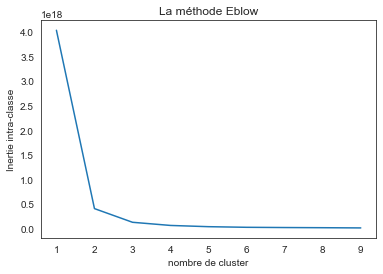

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  sklearn import datasets

df = merge6


tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

* Il semble que la valeur optimale de clusters soit de 2.

## b) Autre méthode : silhouette 

In [60]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X = merge6

#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=2, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)

# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.973


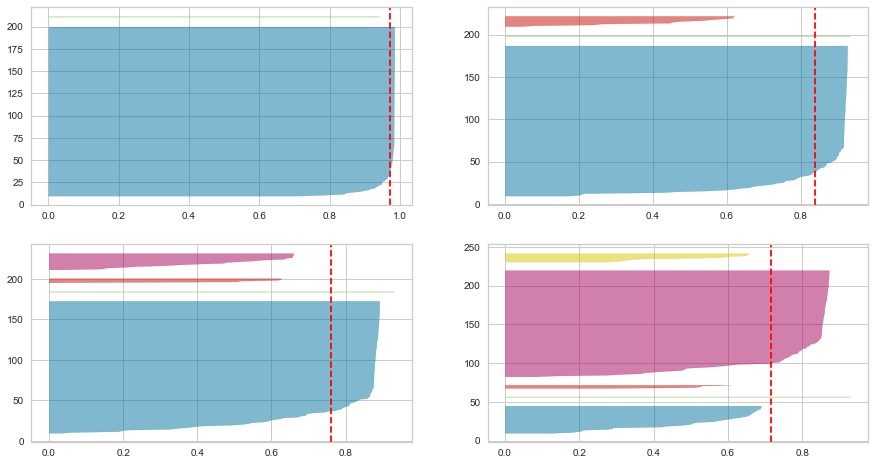

In [61]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

* 2 semble être le nombre optimal de clusters.

## c) Résultats : Données projetées en fonction de 2 clusters

In [62]:
X = merge6
from sklearn import preprocessing
X_norm = preprocessing.scale(X)
X_norm.shape

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.32070496 0.47217916]


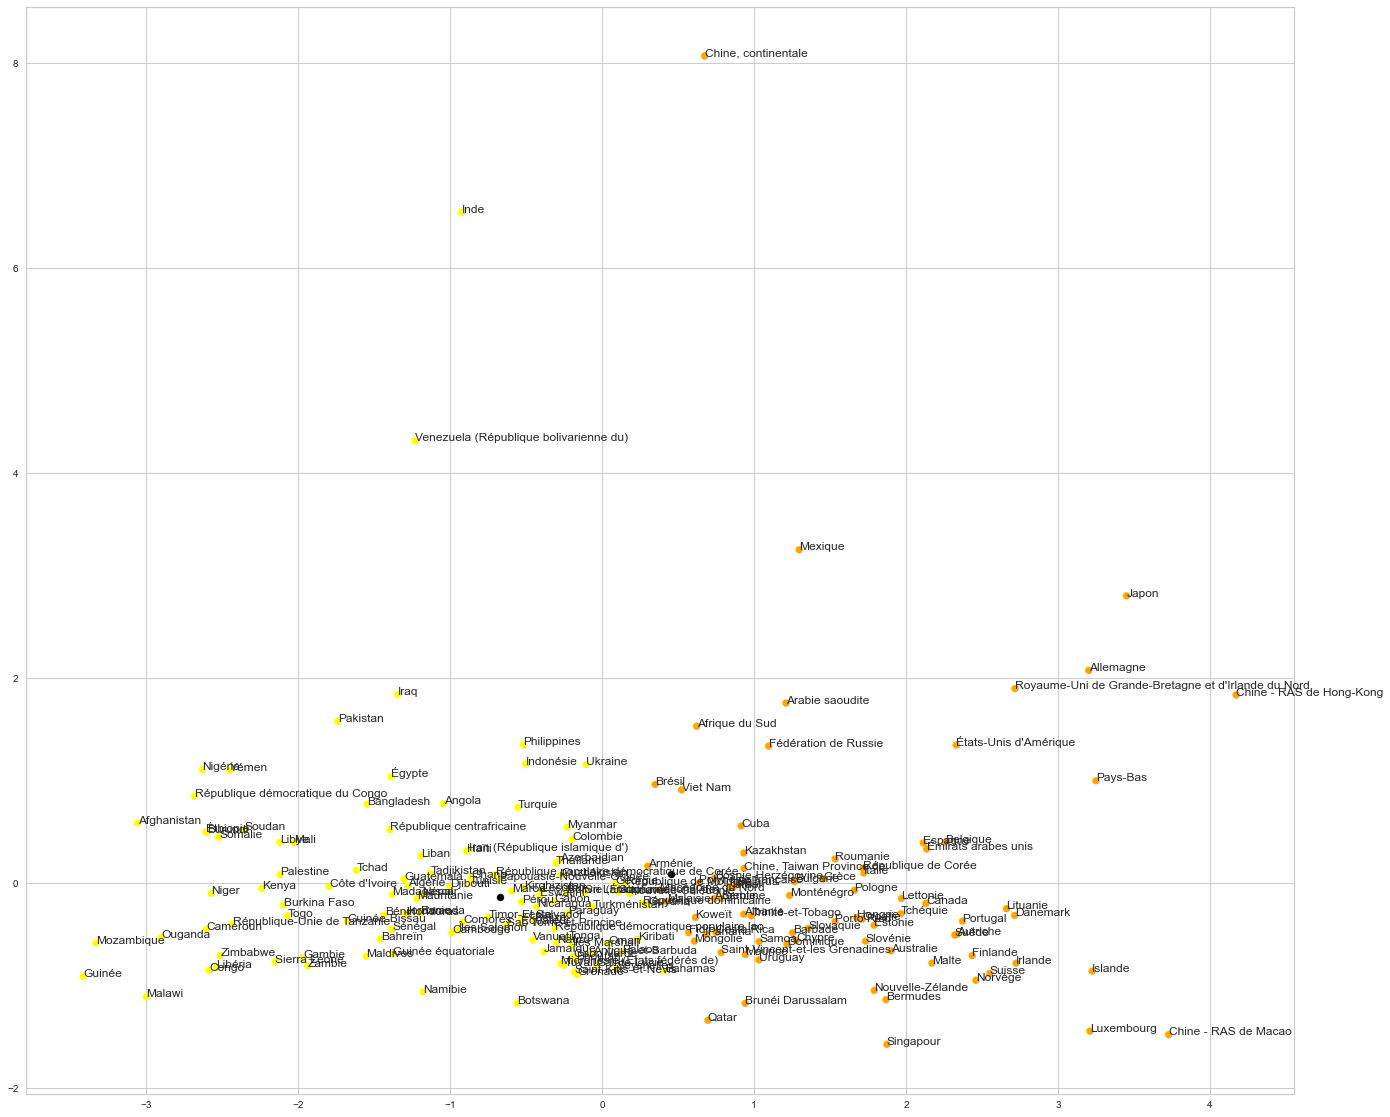

In [63]:
fig = plt.figure(figsize=(50,20))
n = merge6.index
z = X_trans[:,0]
y = X_trans[:,1]

cls = cluster.KMeans(n_clusters=2)
cls.fit(X_norm)
ax = fig.add_subplot(121)
colormap=np.array(["yellow", "orange"])
ax.scatter(X_trans[:,0], X_trans[:,1], c=colormap[cls.labels_])
plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], c="black", s=50)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

# 3) La méthode ACP

* L’ACP peut être utilisée de manière descriptive pour mieux comprendre les corrélations qui existent entre les données. 
* Mais généralement elle est surtout utilisée pour réduire le nombre de dimensions d’un problème. Concrètement nous avons à notre disposition un dataset avec beaucoup de variables. Il existe nécessairement des corrélations dans ce jeux de données et nous avons donc des répétitions, des informations présentes plusieurs fois. 

## Le cercle des corrélations

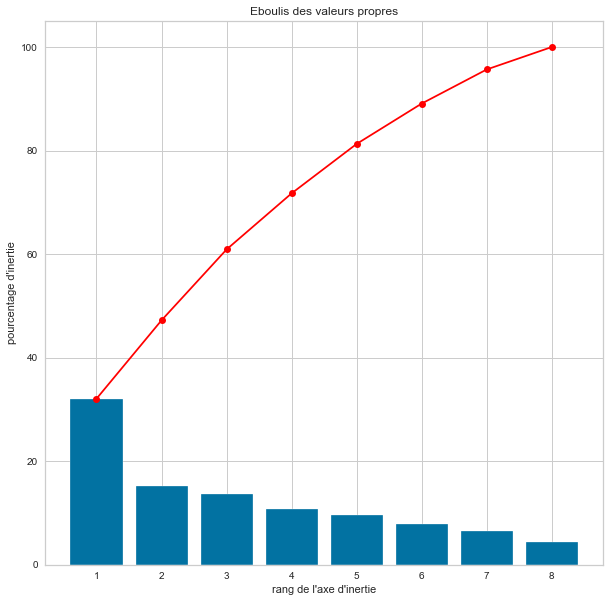

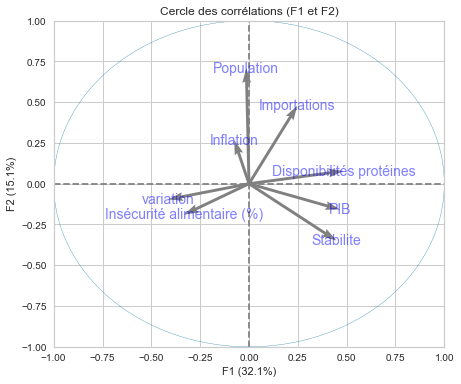

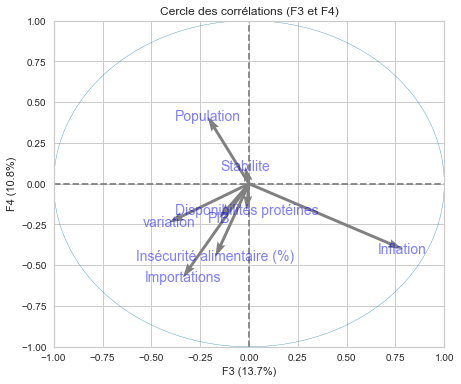

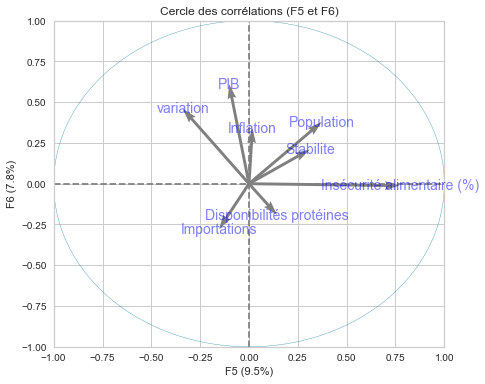

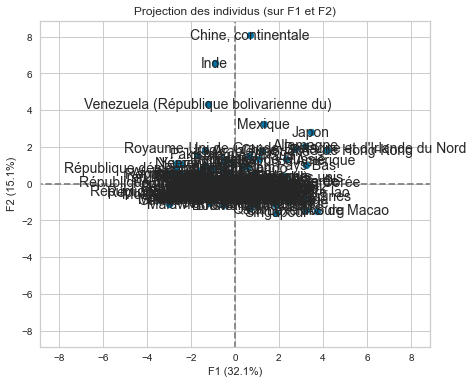

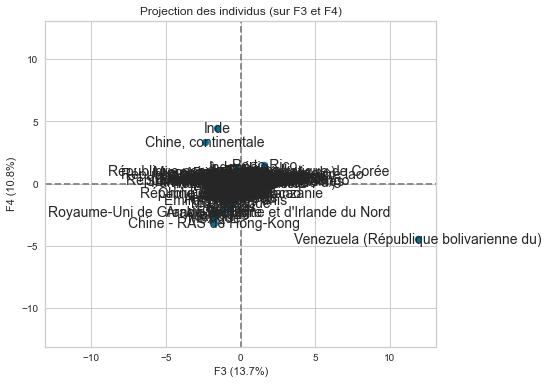

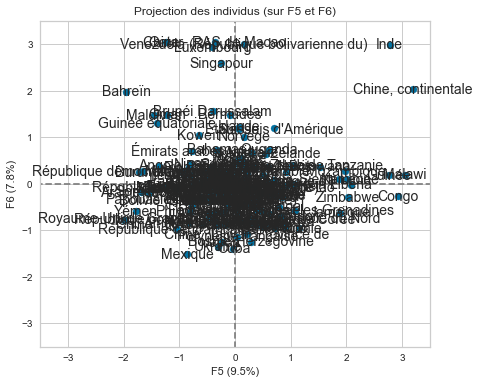

In [64]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
fig1 = plt.figure(figsize=(10,10))

# choix du nombre de composantes à calculer
n_comp = 8

# importation de l'échantillon
data = merge6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = merge6[["variation", "Inflation", "PIB", "Stabilite", "Importations", "Disponibilités protéines", "Insécurité alimentaire (%)", "Population"]]

# préparation des données pour l'ACP
X = data_pca.values
names = data.index # pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

# colorier les 4 clusters = représentation en fonction des couleurs 

* concernant le 1er cercle de corrélation, on constate que le disponibilité alimentaire en protéine contribue fortement à la construction du 1er axe (horizontal).
* Pour le 2e axe (vertical), on fait la même conclusion pour la variable population, elle contribue fortement à la construction de la 2e composante.

In [65]:
cl4 = cluster.KMeans(n_clusters=4)
cl4.fit(X_scaled)

KMeans(n_clusters=4)

In [66]:
centroids = cl4.cluster_centers_
aa = pd.DataFrame(centroids, columns=merge6.columns)
aa

,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Insécurité alimentaire (%),Population
0,-0.659641,-0.130514,0.699650,0.615742,0.335810,0.812039,-0.378285,-0.106182
1,-0.440950,-0.171727,-0.766958,-0.340558,0.858463,-0.171282,-0.563667,9.273294
2,0.550039,-0.021578,-0.531408,-0.469450,-0.279540,-0.637276,0.315726,-0.090224
3,-2.012396,13.593888,-0.907444,-1.279526,-0.293708,-0.317410,-0.563667,-0.063502


In [67]:
#Index trié des clusters
idk = np.argsort(cl4.labels_)

#Affichage des observations selon leurs clusters
mergecl4 = pd.DataFrame(merge6.index[idk], cl4.labels_[idk]).reset_index()
mergecl4 = mergecl4.rename(columns={'index':'cluster'})

In [68]:
#Intégration des clusters 
mergecl4 = pd.merge(merge6, mergecl4, on='Zone')
mergecl4.head()

,Zone,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Insécurité alimentaire (%),Population,cluster
0,Afghanistan,5.470250,6.957529,2058.4,-2.80,29.0,10.7,17.3,36296113.0,2
1,Afrique du Sud,2.931026,6.905835,13860.3,-0.28,514.0,35.7,0,57009756.0,0
2,Albanie,-0.219477,4.135979,12771.0,0.38,38.0,61.0,11,2884169.0,0
3,Algérie,4.181341,5.040496,11737.4,-0.92,2.0,25.0,11.4,41389189.0,2
4,Allemagne,1.064954,2.762497,53071.5,0.59,842.0,63.0,0.7,82658409.0,0


In [69]:
mergecl4.groupby(by="cluster").mean()

,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Population
cluster,,,,,,,
0,1.056457,2.251807,35364.632143,0.526429,134.821429,49.892857,2.322929e+07
1,1.592338,0.814567,3091.450000,-0.380000,226.000000,27.350000,1.379849e+09
2,4.020650,6.050732,8274.800000,-0.502170,27.471698,16.666981,2.553741e+07
3,-2.258323,480.863389,0.000000,-1.270000,25.000000,24.000000,2.940248e+07


In [70]:
mergecl4.reset_index(inplace=True, drop=False)

In [71]:
print(mergecl4[mergecl4['cluster'] == 0]['Zone'].unique())

['Afrique du Sud' 'Albanie' 'Allemagne' 'Arabie saoudite' 'Argentine'
 'Arménie' 'Australie' 'Autriche' 'Bahamas' 'Barbade' 'Bélarus' 'Belgique'
 'Bermudes' 'Bosnie-Herzégovine' 'Brésil' 'Brunéi Darussalam' 'Bulgarie'
 'Canada' 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, Taiwan Province de' 'Chypre' 'Costa Rica' 'Croatie' 'Cuba'
 'Danemark' 'Dominique' 'Émirats arabes unis' 'Espagne' 'Estonie'
 "États-Unis d'Amérique" 'Fédération de Russie' 'Fidji' 'Finlande'
 'Géorgie' 'Grèce' 'Guyana' 'Hongrie' 'Irlande' 'Islande' 'Israël'
 'Italie' 'Japon' 'Kazakhstan' 'Kiribati' 'Koweït' 'Lettonie' 'Lituanie'
 'Luxembourg' 'Macédoine du Nord' 'Malaisie' 'Malte' 'Maurice' 'Mexique'
 'Mongolie' 'Monténégro' 'Norvège' 'Nouvelle-Calédonie' 'Nouvelle-Zélande'
 'Panama' 'Pays-Bas' 'Pologne' 'Polynésie française' 'Porto Rico'
 'Portugal' 'Qatar' 'République de Corée' 'République de Moldova'
 'République dominicaine' 'Roumanie'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 

##### Choix des pays (ACP)

* Élimination des pays sous embargos commerciaux: Bélarus, Fédération de Russie


* Interrogation concernant des produits devant recevoir une certification avant d'être distribués dans ledit pays: *Arabie saoudite, Brunéi Darussalam, Émirats arabes unis, Israël, Koweït, Qatar.*


* Pays UE et contient Européen : *Albanie, Allemagne, Arménie, Autriche, Belgique, Bosnie-Herzégovine, Bulgarie, Chypre, Croatie, Danemark, Espagne, Estonie, Finlande, Grèce, Hongrie, Irlande, Islande, Italie, Lettonie, Lituanie, Luxembourg, Macédoine du Nord, Malte, Monténégro, Norvège, Pays-Bas, Pologne, Portugal, Roumanie, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Serbie, Slovaquie, Slovénie, Suède, Suisse, Tchéquie.*


* Pays hors UE : *Afrique du Sud, Argentine, Australie, Barbade, Bermudes, Brésil, Canada, Chili, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chine -continentale, Chine - Taiwan Province de, Costa Rica, Cuba, Dominique, États-Unis d'Amérique, Fidji, Japon, Kazakhstan, Mexique, Malaisie, Maurice, Mexique, Mongolie, Nouvelle-Zélande, Panama, Polynésie française, Porto Rico, République de Corée, Singapour, Saint-Vincent-et-les Grenadines, Samoa, Trinité-et-Tobago, Uruguay, Viet Nam.*


* Privilégier dans un premier temps les pays de l'UE afin de bénéficier de l'union douanière et les avantages qui en découlent (proximité géographique, monnaie commune (en majorité) afin d'éliminer les risques de change). Au sein de ce groupe, nous allons appliquer les critères établis afin d'effectuer un second filtrage et sélectionner les pays européens les plus adéquats.

###### Je vais sélectionner parmi la liste des 39 pays européens, ceux, consommant le plus de protéine d'origine animale (volaille) et les regrouper par le PIB par habitant également.

In [72]:
 liste1 = ["Albanie", "Allemagne", "Arménie", "Autriche", "Belgique", "Bosnie-Herzégovine", "Bulgarie","Chypre", "Croatie", "Danemark", "Espagne", "Estonie", "Finlande", "Grèce", "Hongrie", "Irlande", "Islande", "Italie", "Lettonie", "Lituanie", "Luxembourg", "Macédoine du Nord","Malte", "Monténégro","Norvège", "Pays-Bas", "Pologne", "Portugal", "Roumanie", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", "Serbie","Slovaquie","Slovénie", "Suède", "Suisse", "Tchéquie"]

In [73]:
len(liste1)

36

In [74]:
acp = merge6
acp['new_col'] = range(1, len(acp) + 1)
acp['new_col'] = acp.index

In [75]:
acpue = acp[acp.new_col.isin(liste1)]

In [76]:
acpuetri = acpue.groupby(["new_col","PIB","Disponibilités protéines"]).mean().sort_values(by="Disponibilités protéines", ascending=False)
acpuetri 

,,,variation,Inflation,Stabilite,Importations,Population
new_col,PIB,Disponibilités protéines,,,,,
Islande,55638.5,103.0,1.256650,-2.410543,1.35,2.0,334393.0
Danemark,55356.7,77.0,0.766063,2.804291,0.87,133.0,5732274.0
Lituanie,33761.9,75.3,-2.949166,3.566524,0.78,44.0,2845414.0
Finlande,47570.1,74.3,0.551876,-0.912609,1.08,16.0,5511371.0
Portugal,33044.7,72.0,-0.769881,1.538968,1.12,82.0,10288527.0
Monténégro,19682.3,68.3,0.096817,1.742749,-0.06,8.0,627563.0
Irlande,77749.2,68.0,2.167773,-2.070201,1.00,99.0,4753279.0
Pays-Bas,55088.6,68.0,0.489111,2.664325,0.92,608.0,17021347.0
Suède,51948.0,67.7,1.433146,2.143091,0.98,84.0,9904896.0


In [77]:
# export 
acpuetri.to_csv('acpuetri.csv')

##### Projection

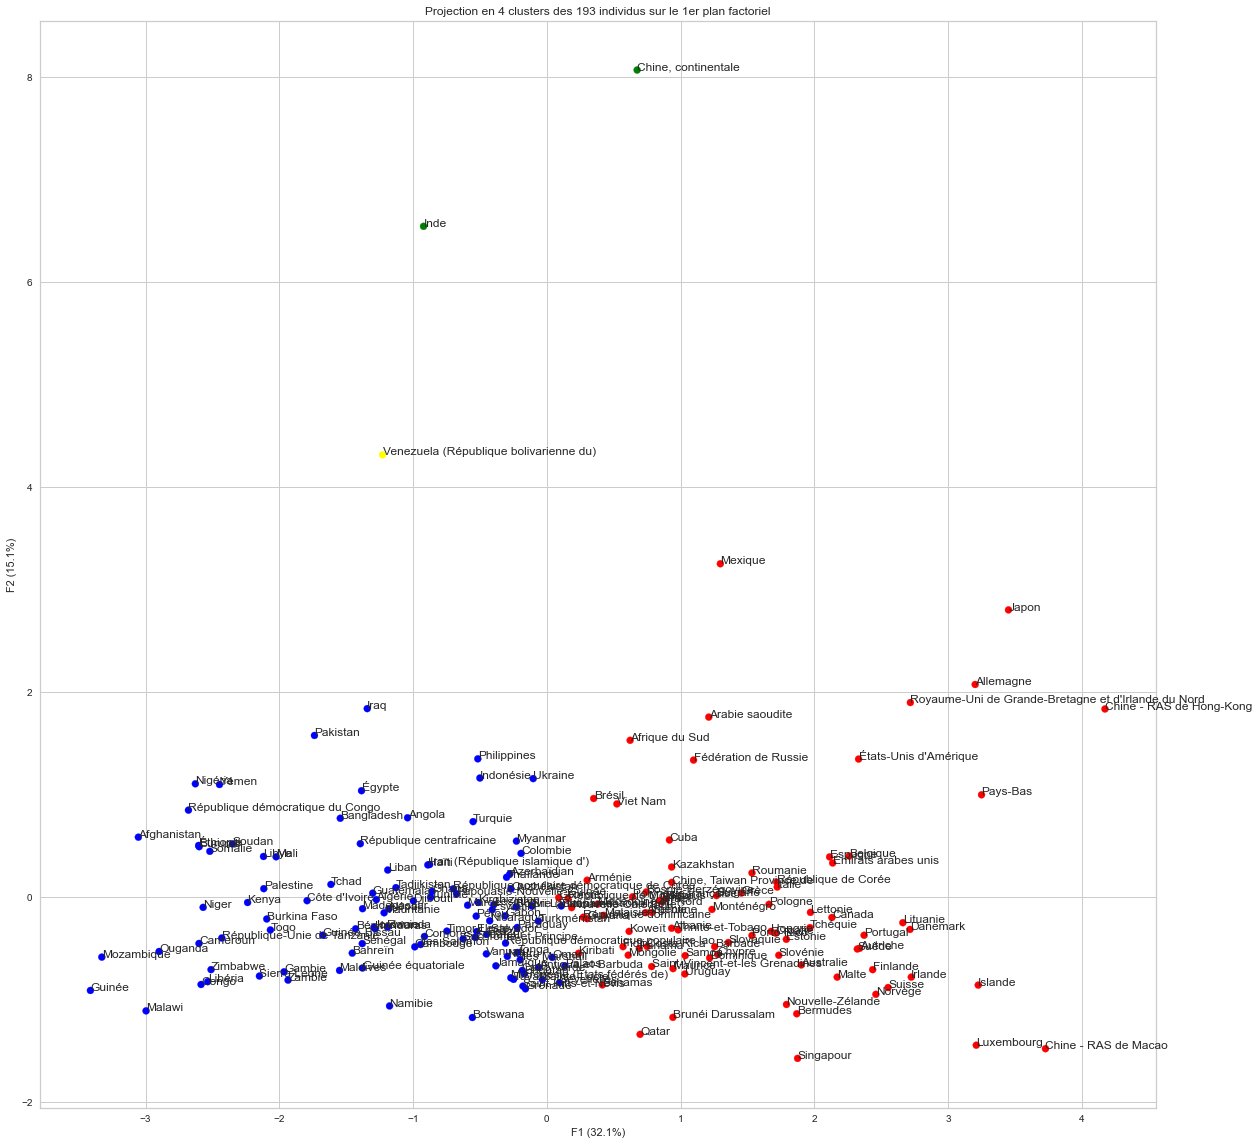

In [78]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 20))

colormap=np.array(["red", "green", "blue", "yellow"])
plt.scatter(X_projected[:,0],X_projected[:,1], c=colormap[cl4.labels_])
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

n = merge6.index
z = X_projected[:,0]
y = X_projected[:,1]


for i, txt in enumerate(n):
    plt.annotate(txt, (z[i], y[i]))
    
plt.show()

le cluster a privilégié est celui de droite.

# Heatmap

In [79]:
aa

,variation,Inflation,PIB,Stabilite,Importations,Disponibilités protéines,Insécurité alimentaire (%),Population
0,-0.659641,-0.130514,0.699650,0.615742,0.335810,0.812039,-0.378285,-0.106182
1,-0.440950,-0.171727,-0.766958,-0.340558,0.858463,-0.171282,-0.563667,9.273294
2,0.550039,-0.021578,-0.531408,-0.469450,-0.279540,-0.637276,0.315726,-0.090224
3,-2.012396,13.593888,-0.907444,-1.279526,-0.293708,-0.317410,-0.563667,-0.063502


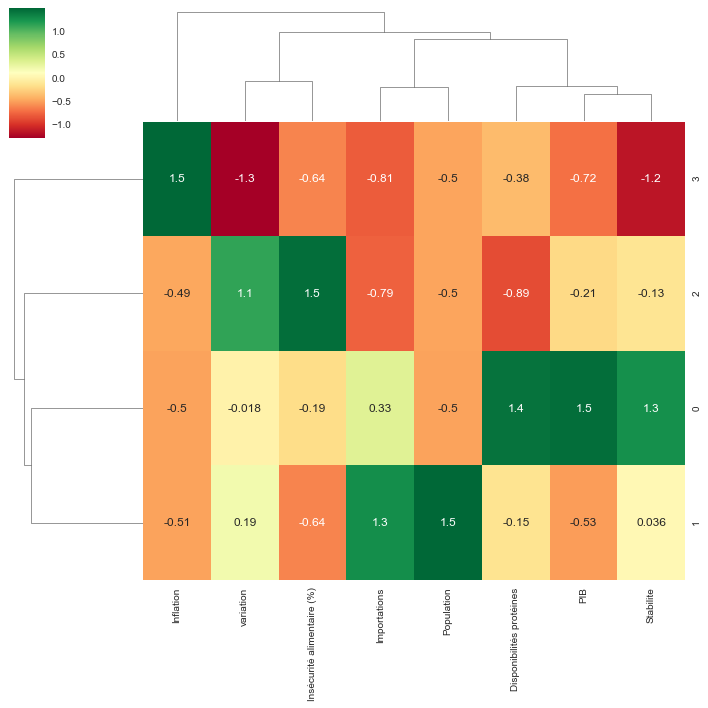

In [80]:
sns.clustermap(aa, z_score=1, cmap="RdYlGn", annot=True)

plt.show()

Nous avons 4 clusters : 0,1,2,3 
Nous avons 8 variables : inflation, variation, insécurité alimentaire, importation, population, disponibilité alimentaire en protéine, PIB et la stabilité politique.


##### L'inflation : 
L'inflation est la perte du pouvoir d'achat de la monnaie qui se traduit par une augmentation générale et durable des prix accompagnée par une baisse des taux. Il s'agit d'un phénomène persistant qui fait entre autres monter l'ensemble des prix.


##### La variation de population : 
* Le déclin démographique peut avoir plusieurs causes telles que : le taux de mortalité est supérieur au taux de natalité, les flux d’émigration nets sont supérieurs à l’accroissement naturel. Les flux migratoires peuvent être induits par des guerres, des événements socio-politiques, des crises économiques ou des événements environnementaux (séismes, éruptions volcaniques, inondations)
* La croissance démographique est l'augmentation de l’effectif d’une population au cours d’une période donnée. La croissance démographique correspond à la somme du solde naturel et du solde migratoire, calculé en général pour une année. L’effectif d’une population augmente quand il y a excédent des naissances sur les décès (solde naturel) et des entrées de migrants sur les sorties (solde migratoire). Le taux d’accroissement annuel est le rapport entre la variation de la population au cours d’une année et son effectif au milieu de l’année.
    
    
##### Insécurité alimentaire : 
Une personne est en situation d'insécurité alimentaire lorsqu'elle n'a pas un accès régulier à suffisamment d'aliments sains et nutritifs pour une croissance et un développement normaux et une vie active et saine.


##### Disponibilité alimentaire (en protéine) : 
La disponibilité des produits alimentaires est clairement une condition sine qua non de la sécurité alimentaire. Cela veut dire que dans un pays, une région, une localité, les produits alimentaires sont physiquement disponibles en quantité suffisante pour assurer la sécurité alimentaire de ses habitants.


##### PIB : 
Le produit intérieur brut aux prix du marché vise à mesurer la richesse créée par tous les agents, privés et publics, sur un territoire national pendant une période donnée.


##### Stabilité politique : 
La stabilité politique se définit comme la combinaison de paix négative et de paix positive. Selon les termes du Global Peace Index (IEP, 2019), la paix négative se définit comme l’absence de violence ou de peur de violence et la paix positive se construit autour des attitudes, des institutions et des structures qui créent et soutiennent des sociétés pacifiques. 

##### Conclusion : 

* Les pays appartenant aux clusters 0,1,2 (-0.5 en moyenne) sont peu impactés par l’inflation contrairement aux pays du cluster 3 (+1.5). Lesdits pays vont donc voir leur pouvoir d’achat reculer. Ainsi, la capacité pour les ménages d’acheter des biens ou des services va être négativement impactée.


* Concernant la variation démographique, les pays des clusters 0 et 1 ont vu leur population légèrement varier. Les pays du cluster 2 (+1.1) ont vu leur population fortement augmenter contrairement aux pays des clusters 3 (-1.3) qui ont connu une forte baisse.


* Les pays du cluster 2 sont fortement impactés par l’insécurité alimentaire (+1.5) a contrario des pays du cluster 0. Les pays des clusters 1 et 3 sont légèrement impactés.

* L'importation est plus importante pour les pays des clusters 2.


* au niveau de la population, les pays du clusters 2 sont ceux regroupant le plus de personnes. Pour les autres clusters, la population est sensiblement égale.




* Concernant la consommation de protéine d’origine animale, les pays des clusters 1 (+1.4) a contrario du cluster 0.



* Les habitants ayant le PIB le plus élevé sont les pays des clusters 1 (+1.5). Les pays sont du cluster 3 (-0.72) sont ceux ayant le PIB par habitant le plus faible.


* Concernant la stabilité alimentaire, les pays des clusters 1 et 2 sont stables contrairement aux pays des clusters 3 et 0.



##### Idéalement, il faut privilégier les pays du cluster n°1.
